<a href="https://colab.research.google.com/github/egor501123/Deep-Learning-School-2022/blob/main/Kaggle_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [27]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data_train = pd.read_csv('./train (2).csv')
data_test =  pd.read_csv('./test.csv')
data_train.head(5)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
data_train.sample()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5160,23,19.6,426.65,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0


In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [ ]:
data_train.isna().sum() #Нет нуллов

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data_train.isna().sum()  #Нет нуллов

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data_train.describe(include="object")

,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,4978,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,9,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


In [ ]:

data_train.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [ ]:
pd.to_numeric(data_train["TotalSpent"]) #Видимо есть не только числа (

ValueError: ignored

In [ ]:
data_train["TotalSpent"] = pd.to_numeric(data_train["TotalSpent"], errors="coerce")
data_test["TotalSpent"] = pd.to_numeric(data_train["TotalSpent"], errors="coerce") #Заполним эти значения нулами
data_train.isna().sum() 

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

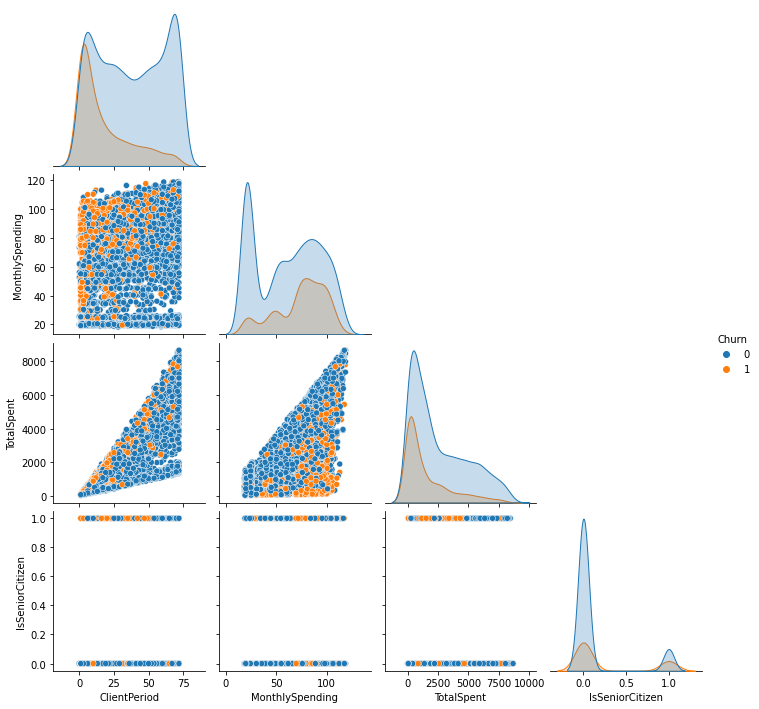

In [ ]:
import seaborn as sns
sns.pairplot(data=data_train, hue="Churn", corner=True);

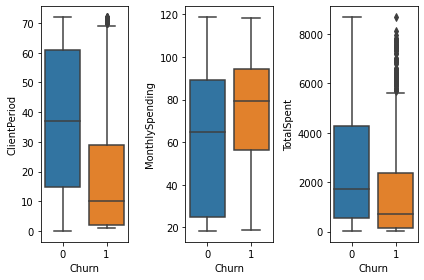

In [ ]:
fig, all_axes = plt.subplots(nrows=1, ncols=3)
all_features = ["ClientPeriod", "MonthlySpending", "TotalSpent"]

for axes, feature in zip(all_axes, all_features):
    sns.boxplot(x="Churn", y=feature, data=data_train, ax=axes)
    
plt.tight_layout()

In [ ]:
cat_columns = data_train[cat_cols].loc[:, cat_cols]
for col in cat_columns.columns:
    print(col, cat_columns[col].unique())
    

Sex ['Male' 'Female']
IsSeniorCitizen [0 1]
HasPartner ['Yes' 'No']
HasChild ['Yes' 'No']
HasPhoneService ['Yes' 'No']
HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
HasInternetService ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService ['No internet service' 'No' 'Yes']
HasOnlineBackup ['No internet service' 'No' 'Yes']
HasDeviceProtection ['No internet service' 'No' 'Yes']
HasTechSupportAccess ['No internet service' 'Yes' 'No']
HasOnlineTV ['No internet service' 'No' 'Yes']
HasMovieSubscription ['No internet service' 'No' 'Yes']
HasContractPhone ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless ['No' 'Yes']
PaymentMethod ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


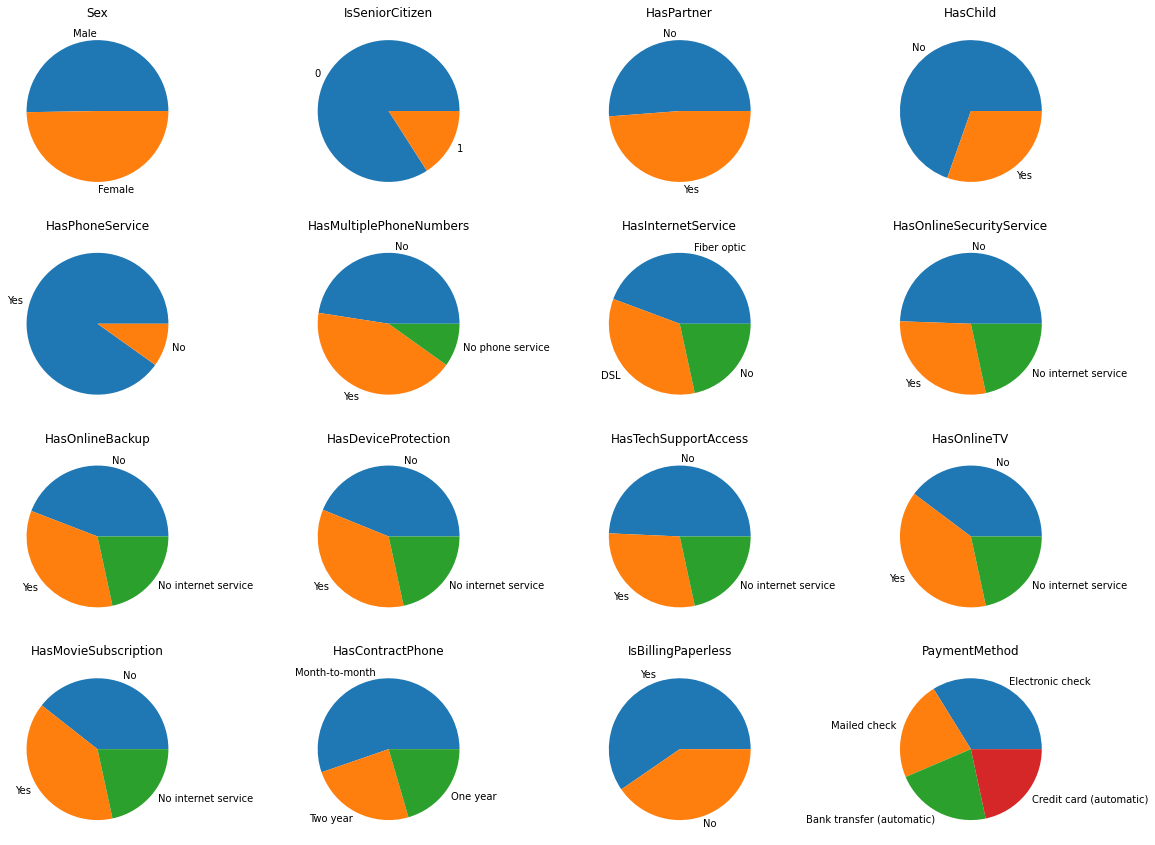

In [ ]:
import math
fig, all_axes = plt.subplots(4, 4)
fig.set_size_inches(20, 15)

for axes, cat_col in zip(all_axes.ravel(), cat_columns):
    freq = cat_columns[cat_col].value_counts().values
    names = cat_columns[cat_col].value_counts().index
    axes.pie(freq, labels = names)
    axes.title.set_text(cat_col)




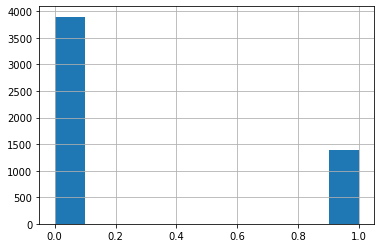

In [ ]:
data_train["Churn"].hist(); #Классы несбалансированы 

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [ ]:
y = data_train["Churn"]
X = data_train.drop(columns=["Churn"])



In [ ]:
num_pipeline = Pipeline([
    ("simple_imputer", SimpleImputer(strategy="median")),
    ("standart_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("cat_encoder", OneHotEncoder(drop="if_binary", sparse=False))
])

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols), 
    ("cat", cat_pipeline, cat_cols)
])

X_train = preprocess_pipeline.fit_transform(X)
X_test = preprocess_pipeline.fit_transform(data_test)



In [ ]:
log_reg_clf = LogisticRegression(n_jobs=-1)
preprocess_predict_pipeline = Pipeline([
    ("preprocessor", preprocess_pipeline),
    ("log_reg_clf", log_reg_clf)
])
cv_results = cross_val_score(preprocess_predict_pipeline, X, y, scoring="roc_auc", cv=10, verbose=5, n_jobs=-1)
cv_results.mean()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


0.8446695278180048

In [36]:
def write_to_submission_file(predicted_labels, name,
                             target='Churn', index_label="Id"):
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(len(predicted_labels)),
                                columns=[target])
    predicted_df.to_csv(name , index_label=index_label)

In [35]:
from sklearn.model_selection import GridSearchCV

param_log_reg_clf = {"log_reg_clf__C": np.logspace(1, 5, 20),
                          "preprocessor__num__simple_imputer__strategy": ["mean", "median"],
                          "preprocessor__cat__cat_encoder__drop": ["if_binary", None]
                         }
grid_log_reg_clf = GridSearchCV(estimator=preprocess_predict_pipeline,
                                  param_grid=param_log_reg_clf,
                                  scoring="roc_auc",
                                  n_jobs=-1, cv=5, verbose=5)

grid_log_reg_clf.fit(X, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standart_scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                       

In [38]:
log_reg_clf_predictions = grid_log_reg_clf.predict_proba(data_test)[:, 1]

write_to_submission_file(log_reg_clf_predictions, "log_reg2.csv")



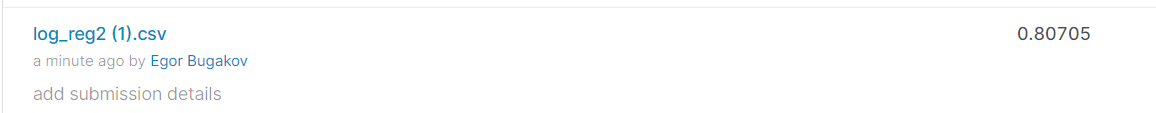

In [41]:
param_grid_log_reg_clf2 = {"log_reg_clf__C": np.linspace(-3,10 , 100),
                           "log_reg_clf__penalty": ['l1', 'l2', 'elasticnet', 'none'],
                           "log_reg_clf__class_weight": ["balanced", None], 
                           "log_reg_clf__max_iter": [100, 200,300]
                          }

grid_log_reg_clf2 = GridSearchCV(estimator=grid_log_reg_clf.best_estimator_,
                                  param_grid=param_grid_log_reg_clf2,
                                  scoring="roc_auc",
                                  n_jobs=-1, cv=5, verbose=5)

grid_log_reg_clf2.fit(X, y)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7380 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standart_scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                       

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [42]:
log_reg_clf_predictions = grid_log_reg_clf2.predict_proba(data_test)[:, 1]

write_to_submission_file(log_reg_clf_predictions, "log_reg3.csv")


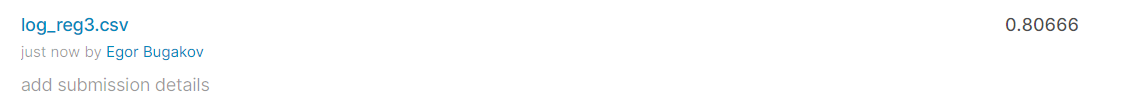

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [24]:
!pip install catboost
import catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [25]:
X_train_catboost, X_valid_catboost, y_train_catboost, y_valid_catboost = train_test_split(X, y, random_state=42, stratify=y)


In [28]:
boosting_model = catboost.CatBoostClassifier(eval_metric='AUC', 
                                             cat_features=cat_cols)

boosting_model.fit(X_train_catboost,y_train_catboost)

y_train_predicted = boosting_model.predict_proba(X_train_catboost)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_valid_catboost)[:, 1]

train_auc = roc_auc_score( y_train_catboost, y_train_predicted)
test_auc = roc_auc_score( y_valid_catboost, y_test_predicted)
print(boosting_model.get_params())

Learning rate set to 0.018544
0:	total: 9.25ms	remaining: 9.24s
1:	total: 14.5ms	remaining: 7.23s
2:	total: 26.5ms	remaining: 8.82s
3:	total: 39.7ms	remaining: 9.88s
4:	total: 54.8ms	remaining: 10.9s
5:	total: 69.2ms	remaining: 11.5s
6:	total: 73.5ms	remaining: 10.4s
7:	total: 86.1ms	remaining: 10.7s
8:	total: 91.5ms	remaining: 10.1s
9:	total: 105ms	remaining: 10.4s
10:	total: 117ms	remaining: 10.6s
11:	total: 129ms	remaining: 10.6s
12:	total: 142ms	remaining: 10.8s
13:	total: 153ms	remaining: 10.8s
14:	total: 169ms	remaining: 11.1s
15:	total: 182ms	remaining: 11.2s
16:	total: 190ms	remaining: 11s
17:	total: 208ms	remaining: 11.4s
18:	total: 227ms	remaining: 11.7s
19:	total: 242ms	remaining: 11.9s
20:	total: 255ms	remaining: 11.9s
21:	total: 270ms	remaining: 12s
22:	total: 284ms	remaining: 12.1s
23:	total: 298ms	remaining: 12.1s
24:	total: 309ms	remaining: 12s
25:	total: 321ms	remaining: 12s
26:	total: 337ms	remaining: 12.2s
27:	total: 360ms	remaining: 12.5s
28:	total: 375ms	remaining:

In [30]:
log_reg_clf_predictions = boosting_model.predict_proba(data_test)[:, 1]

write_to_submission_file(log_reg_clf_predictions, "boost")


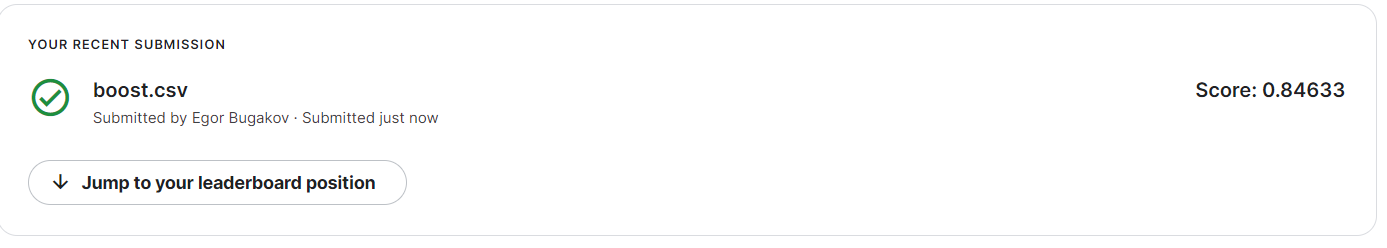
  
)

In [31]:
boosting_model = catboost.CatBoostClassifier(eval_metric = 'AUC',cat_features=cat_cols,silent=True)
params = {'learning_rate': np.linspace(0.0001, 0.001, 200),
          'num_trees': np.linspace(1, 200,1),
          'depth': np.linspace(4, 10,1),
          'l2_leaf_reg' :np.linspace(0.1, 5,10)}
boosting_model.grid_search(params, 
                           X_train_catboost, 
                           y_train_catboost)

boosting_model.best_score_
y_train_predicted = boosting_model.predict_proba(X_train_catboost)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_valid_catboost)[:, 1]

train_auc = roc_auc_score( y_train_catboost, y_train_predicted)
test_auc = roc_auc_score( y_valid_catboost, y_test_predicted)
print(train_auc,test_auc)

Выходные данные были обрезаны до нескольких последних строк (5000).

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1169:	loss: 0.7489621	best: 0.7489621 (1000)	total: 10.4s	remaining: 7.34s

bestTest = 0.7489621151
bestIteration = 0

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1170:	loss: 0.7489621	best: 0.7489621 (1000)	total: 10.4s	remaining: 7.33s

bestTest = 0.7489621151
bestIteration = 0

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1171:	loss: 0.7489621	best: 0.7489621 (1000)	total: 10.4s	remaining: 7.33s

bestTest = 0.7489621151
bestIteration = 0

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1172:	loss: 0.7489621	best: 0.7489621 

In [33]:
log_reg_clf_predictions = boosting_model.predict_proba(data_test)[:, 1]

write_to_submission_file(log_reg_clf_predictions, "boost1")

Почему-то из-за хода по сетки результат заметно уменьшился 


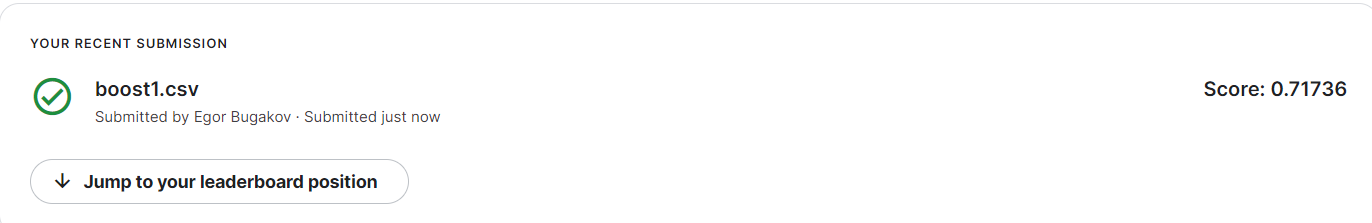